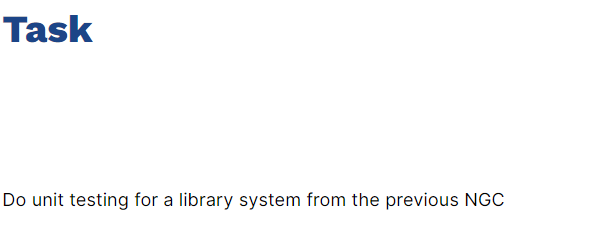

In [11]:
from collections import UserDict 

# UserDict adalah sebuah class dalam module collections yang mana jika sebuah kelas inherits UserDict, 
# maka class tersebut akan berperilaku seperti Dictionary

In [12]:
class Book_catalog(UserDict):
    '''
    class ini inherits sebuah Class parent UserDict dari module collections
    tidak perlu membuat constructor untuk class Book_catalog, cukup membuat method2 yang sesuai
    >>> Setiap value dari parameter method pada class ini dapat diolah menjadi dictionary dan value akan langsung disimpan dalam self.data
    '''
    
    #method untuk menambah buku ke self.data
    def add_book(self, title, author, id):
        if id not in self.data:
            self.data[id]={}
        self.data[id]={'Title':title, 'Author':author}
        
    
    # method untuk mengapus buku            
    def delete_book_by_id(self, id):
        if id in self.data.keys():
            del self.data[id]
        else:
            print("Book doesn't exist")
            
    # method untuk menampilkan isi semua buku yang ada
    def display(self):
        return self.data
    
    # method untuk mencari buku berdasarkan judul atau author sebagai kata kunci. 
    def search(self, keywords):
        result =[]
        for key, value in self.data.items():
            if (value["Title"] == keywords) or (value["Author"] == keywords):
                entry = f"({value['Title']}) by {value['Author']}"
                result.append(entry)
        if not result:
            return "Buku tidak ditemukan"
        return result
    

In [25]:
import unittest
class LibaryTesting(unittest.TestCase):
    
    # method setup yang akan mengawali test, kita menyiapkan bahwa self.libary adalah object untuk Book_catalog class
    def setUp(self):
        self.library = Book_catalog()
    
    def test_AddingBookSuccess(self):
        self.library.add_book("Sebuah judul yang ditest", "Nama yang ditest", 100)
        self.assertEqual(self.library.data[100]["Title"], 'Sebuah judul yang ditest')
        self.assertEqual(self.library.data[100]["Author"], 'Nama yang ditest')
    
    def test_DeleteBook(self):
        self.library.add_book("Sebuah judul yang ditest", "Nama yang ditest", 200)
        self.library.delete_book_by_id(200)
        self.assertNotIn(200, self.library.data)
    
    def test_Display(self):
        self.library.add_book("Sebuah judul yang ditest", "Nama yang ditest", 500)
        self.library.add_book("Sebuah judul yang ditest", "Nama yang ditest", 600)
        self.assertEqual(2, len(self.library.data))
    
    def test_searchBook(self):
        # tambahin dulu yang akan dicari
        self.library.add_book("Judul Buku 1", "Nama A", 10)
        self.library.add_book("Judul Buku 2", "Nama B", 20)
        
        # simpan ke dalam container: pencarian menggunakan judul buku dan author
        result_judul = self.library.search('Judul Buku 1')
        result_author = self.library.search('Nama B')
        
        # karena hasil return adalah lis, maka lebih baik menggunakan assertIn
        # hasil pencarian disebelah kanan karena berupa list dari sebuah f-string
        self.assertIn('(Judul Buku 1) by Nama A', result_judul)
        self.assertIn('(Judul Buku 2) by Nama B', result_author)
        
        # test jika buku tidak ada, test apakah balikan sesuai dengan yang diisi
        not_found = self.library.search("Buku apalah itu")
        self.assertIn(not_found, "Buku tidak ditemukan")
        
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_AddingBookSuccess (__main__.LibaryTesting.test_AddingBookSuccess) ... ok
test_DeleteBook (__main__.LibaryTesting.test_DeleteBook) ... ok
test_Display (__main__.LibaryTesting.test_Display) ... ok
test_searchBook (__main__.LibaryTesting.test_searchBook) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK
